In [1]:
import requests 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome()

In [3]:
urls = "https://www.screener.in/company/compare/00000034/"

In [4]:
l_url = []
for i in range(1,23):
    url = f"https://www.screener.in/company/compare/00000026/?page={i}"
    driver.get(url)
    l_url.append(BeautifulSoup(driver.page_source,"html.parser"))
len(l_url)

22

In [5]:
companies = []
for j in range(len(l_url)):
    for i in l_url[j].find_all("td",class_="text"):
        if(i.a):
            companies.append(i.a.text)
(companies)

['Bajaj Finance',
 'Bajaj Finserv',
 'Jio Financial',
 'I R F C',
 'Power Fin.Corpn.',
 'REC Ltd',
 'Cholaman.Inv.&Fn',
 'Shriram Finance',
 'Bajaj Holdings',
 'HDFC AMC',
 'Muthoot Finance',
 'SBI Cards',
 'Indian Renewable',
 'Aditya Birla Cap',
 'Bajaj Housing',
 'Sundaram Finance',
 'H U D C O',
 'L&T Finance Ltd',
 'Nippon Life Ind.',
 'M & M Fin. Serv.',
 '360 ONE',
 'LIC Housing Fin.',
 'Max Financial',
 'Chola Financial',
 'Tata Inv.Corpn.',
 'Poonawalla Fin',
 'PNB Housing',
 'TVS Holdings',
 'Authum Invest',
 'Piramal Enterp.',
 'IIFL Finance',
 'Five-Star Bus.Fi',
 'Aditya AMC',
 'CreditAcc. Gram.',
 'Aadhar Hsg. Fin.',
 'IFCI',
 'Manappuram Fin.',
 'I D F C',
 'Capri Global',
 'Aptus Value Hou.',
 'UTI AMC',
 'Anand Rathi Wea.',
 'AAVAS Financiers',
 'Can Fin Homes',
 'JM Financial',
 'Sammaan Capital',
 'Mah. Scooters',
 'Edelweiss.Fin.',
 'Bengal & Assam',
 'Home First Finan',
 'Religare Enterp.',
 'Choice Intl.',
 'SBFC Finance',
 'Sundaram Fin.Hol',
 'JSW Holdings',
 'K

In [6]:
import re

In [7]:
column_values = []
for j in range(len(l_url)):
    for i in l_url[j].find_all("tr"):
        pattern = re.findall("[+-]?([0-9]*[.])?[0-9]+",i.text)
        if(len(pattern)!=0):
            [column_values.append((i.text))]
len(column_values)

529

In [1]:
new_list = []

for j in range(len(l_url)):
    a_ = l_url[j].find_all("td",class_="text")
    print(a_)
    for i in range(len(a_)):
        if(i%2==0):
            b = [x.text for x in (a_[i].find_next_siblings())]
            if (len(b)==10):
                new_list.append(b)


NameError: name 'l_url' is not defined

### Data Cleaning

In [9]:
import pandas as pd

columns_headings = ["Name","CMP","P/E","Market Cap","Dividend Yield%","NP Qtr","Qtr Profit Var%","Sales Qtr","Qtr Sales Var%","ROCE%"]
df = pd.DataFrame(
   new_list,
    columns=columns_headings,
)

C:\Users\bhanp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
df.to_csv("FinanceStocksUncleaned.csv")

In [11]:
df_1 = pd.read_csv(r"C:\Users\bhanp\FinanceStocksUncleaned.csv")
df_1.head()

,Unnamed: 0,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%
0,0,\nBajaj Finance\n,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93
1,1,\nBajaj Finserv\n,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72
2,2,\nJio Financial\n,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55
3,3,\nI R F C\n,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73
4,4,\nPower Fin.Corpn.\n,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85


In [12]:
df.isna().sum()

Name               0
CMP                0
P/E                0
Market Cap         0
Dividend Yield%    0
NP Qtr             0
Qtr Profit Var%    0
Sales Qtr          0
Qtr Sales Var%     0
ROCE%              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             529 non-null    object
 1   CMP              529 non-null    object
 2   P/E              529 non-null    object
 3   Market Cap       529 non-null    object
 4   Dividend Yield%  529 non-null    object
 5   NP Qtr           529 non-null    object
 6   Qtr Profit Var%  529 non-null    object
 7   Sales Qtr        529 non-null    object
 8   Qtr Sales Var%   529 non-null    object
 9   ROCE%            529 non-null    object
dtypes: object(10)
memory usage: 41.5+ KB


In [14]:
sum(df.duplicated())

0

In [15]:
# Removing "\n" from Name Column
df["Name"] = [x.strip() for x in df["Name"]]

In [16]:
df.head()

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85


### Outliers

In [17]:
df

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85
...,...,...,...,...,...,...,...,...,...,...
524,Charms Industrie,5.51,,2.26,0.00,-0.03,0.00,0.00,-100.00,-24.30
525,Oswal Leasing,39.77,,1.99,0.00,-0.01,,0.04,0.00,-1.44
526,Geetanjali Cred.,4.28,189.00,1.89,0.00,0.00,100.00,0.00,,0.00
527,Aneri Fincap,6.19,,1.87,0.00,0.00,100.00,0.00,-100.00,-620.05


* Replacing empty values with 0

In [18]:
df["P/E"]=df["P/E"].replace("",0.00)

In [19]:
df["Qtr Profit Var%"]=df["Qtr Profit Var%"].replace("",0.00)

In [20]:
df["Qtr Sales Var%"]=df["Qtr Sales Var%"].replace("",0.00)

In [21]:
df["ROCE%"]=df["ROCE%"].replace("",0.00)

In [22]:
df["NP Qtr"]= df["NP Qtr"].replace("",0.00)

In [23]:
df["Dividend Yield%"] = df["Dividend Yield%"].replace("",0.00)

In [24]:
df.keys()

Index(['Name', 'CMP', 'P/E', 'Market Cap', 'Dividend Yield%', 'NP Qtr',
       'Qtr Profit Var%', 'Sales Qtr', 'Qtr Sales Var%', 'ROCE%'],
      dtype='object')

In [25]:
df.drop(13,inplace=True,axis=0)

In [26]:
df.drop(208,inplace=True,axis=0)

In [27]:
df.drop(207,inplace=True,axis=0)

In [28]:
df = df.drop(df[df["CMP"]==""].index)

In [29]:
df.head()

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85


In [30]:
df["Sales Qtr"] = df["Sales Qtr"].replace("",0.00)

In [31]:
# Converting object to float data type
convert_dict = {'CMP': float,
                'P/E': float,
                'Market Cap': float,
                'Dividend Yield%':float,
                'NP Qtr':float,
                'Qtr Profit Var%':float,
                'Sales Qtr':float,
                'Qtr Sales Var%':float,
                'ROCE%':float,
}  
 
df = df.astype(convert_dict)
print(df.dtypes)

Name                object
CMP                float64
P/E                float64
Market Cap         float64
Dividend Yield%    float64
NP Qtr             float64
Qtr Profit Var%    float64
Sales Qtr          float64
Qtr Sales Var%     float64
ROCE%              float64
dtype: object


In [32]:
# Descriptive stats
df.describe()

,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,534.694027,52.761240,6371.735725,0.240954,81.254714,180.675191,416.603645,1776.112653,7.275802
std,2179.089181,157.971478,32119.981522,0.666950,464.929245,1009.843835,2234.828306,34419.869124,42.270643
min,0.030000,0.000000,0.390000,0.000000,-206.900000,-6600.000000,-0.090000,-112.000000,-620.050000
25%,14.000000,3.200000,17.480000,0.000000,0.010000,-24.625000,0.200000,0.000000,0.575000
50%,48.270000,16.785000,64.640000,0.000000,0.445000,20.050000,2.115000,11.370000,6.375000
75%,217.412500,37.970000,510.585000,0.000000,5.057500,104.670000,22.700000,58.052500,12.352500
max,34290.000000,2287.740000,470344.350000,5.770000,7182.060000,10964.260000,31479.930000,786736.360000,437.750000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 528
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             524 non-null    object 
 1   CMP              524 non-null    float64
 2   P/E              524 non-null    float64
 3   Market Cap       524 non-null    float64
 4   Dividend Yield%  524 non-null    float64
 5   NP Qtr           524 non-null    float64
 6   Qtr Profit Var%  524 non-null    float64
 7   Sales Qtr        524 non-null    float64
 8   Qtr Sales Var%   524 non-null    float64
 9   ROCE%            524 non-null    float64
dtypes: float64(9), object(1)
memory usage: 45.0+ KB


### Data Modeling

In [34]:
# Creating Large , Mid, Small cap categories
sum(df["Market Cap"]>20000),sum(df["Market Cap"]<5000),len(df[(df["Market Cap"]<20000) & (df["Market Cap"]>5000)])

(32, 465, 27)

In [35]:
# If Market Cap > 20000 -> Large Cap , Market Cap < 20000 and >5000 -> Mid Cap , Market Cap < 5000 -> Small Cap 
def type_cap(row):
    if row['Market Cap']>20000:
        val = "Large Cap"
    elif (row["Market Cap"]<20000) & (row["Market Cap"]>5000):
        val = "Mid Cap"
    else:
        val = "Small Cap"
    return val

In [36]:
# Conservative Case : EPS Growth Large Cap -> 8% ,Mid Cap -> 7% , Small Cap -> 6%
def eps_growth(df):
    if df["Type of CAP"]=="Large Cap":
        val = 8
    elif df["Type of CAP"]=="Mid Cap":
        val = 7 
    else:
        val = 6
    return val


In [37]:
# Peter Lynch Value 
def peter_lynch(df):
    value = ""
    if  (df["P/E"]!=0.00):
        peter_lynch_val = (df["EPS Growth"]+df["Dividend Yield%"])/(df["P/E"])
        if peter_lynch_val<1:
            value = "Overvalued"
        elif peter_lynch_val>1 and peter_lynch_val<1.5:
            value = "Under Valued"
        elif peter_lynch_val>1.5 and peter_lynch_val<2:
            value = "Fairly Valued"
        return value
    else:
        value = "Not Eligible"
        return value

In [38]:
df.head()

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85


In [39]:
df["Type of CAP"] = df.apply(type_cap, axis=1)

In [40]:
df["EPS Growth"] = df.apply(eps_growth, axis=1)

In [41]:
df["Peter Lynch Value"] = df.apply(peter_lynch, axis=1)

In [42]:
sum(df["P/E"]==0.00)

117

In [43]:
df["Peter Lynch Value"].value_counts()

Peter Lynch Value
Overvalued       367
Not Eligible     117
Under Valued      22
                  12
Fairly Valued      6
Name: count, dtype: int64

<Axes: >

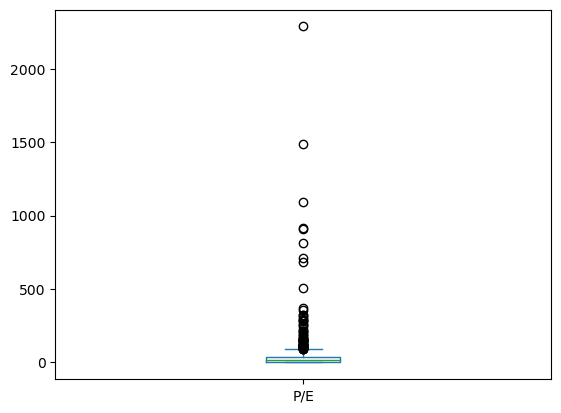

In [44]:
df["P/E"].plot(kind="box")

In [45]:
def Outlier(column):
    q1 =df[df["Type of CAP"] !="Large Cap"][column].quantile(0.25)
    q3 = df[df["Type of CAP"] !="Large Cap"][column].quantile(0.75)
    iqr = q3 - q1
    lower = max(min(df[df["Type of CAP"] !="Large Cap"][column]), q1 - 1.5 * iqr)
    upper = min(max(df[df["Type of CAP"] !="Large Cap"][column]), q3 + 1.5 * iqr)
    return df[((df[column]<lower) | (df[column]>upper)) & (df["Type of CAP"]!="Large Cap")]

In [46]:
df.drop(list(Outlier("P/E").index),axis=0,inplace=True)

In [47]:
df.reset_index(inplace=True)

In [48]:
df

,index,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
0,0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued
1,1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72,Large Cap,8,Overvalued
2,2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55,Large Cap,8,Overvalued
3,3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued
4,4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,523,Lyons Corporate,4.87,0.00,2.28,0.00,-0.05,-25.00,0.22,144.44,4.85,Small Cap,6,Not Eligible
463,524,Charms Industrie,5.51,0.00,2.26,0.00,-0.03,0.00,0.00,-100.00,-24.30,Small Cap,6,Not Eligible
464,525,Oswal Leasing,39.77,0.00,1.99,0.00,-0.01,0.00,0.04,0.00,-1.44,Small Cap,6,Not Eligible
465,527,Aneri Fincap,6.19,0.00,1.87,0.00,0.00,100.00,0.00,-100.00,-620.05,Small Cap,6,Not Eligible


In [49]:
df.drop(["index"],inplace=True,axis=1)

In [50]:
df

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72,Large Cap,8,Overvalued
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55,Large Cap,8,Overvalued
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Lyons Corporate,4.87,0.00,2.28,0.00,-0.05,-25.00,0.22,144.44,4.85,Small Cap,6,Not Eligible
463,Charms Industrie,5.51,0.00,2.26,0.00,-0.03,0.00,0.00,-100.00,-24.30,Small Cap,6,Not Eligible
464,Oswal Leasing,39.77,0.00,1.99,0.00,-0.01,0.00,0.04,0.00,-1.44,Small Cap,6,Not Eligible
465,Aneri Fincap,6.19,0.00,1.87,0.00,0.00,100.00,0.00,-100.00,-620.05,Small Cap,6,Not Eligible


### Data Visualization

1) What are the Large Cap Companies having P/E>35 and ROCE < mean of ROCE?
2) What are the top companies in Large,Mid,Small having top quarterly sales ?
3) What are the top companies in Large,Mid,Small having top quarterly Net Profit ?
4) What are the top companies in Large,Mid,Small having top quarterly Net Profit %?
5) What are the top 10 companies in Large,Mid,Small giving highest  dividend ?
6) BlueChips having more than mean profit,sales,ROCE but P/E is less ? 
7) What are undervalued stocks,overvalued,Faily valued ? 

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df.shape

(467, 13)

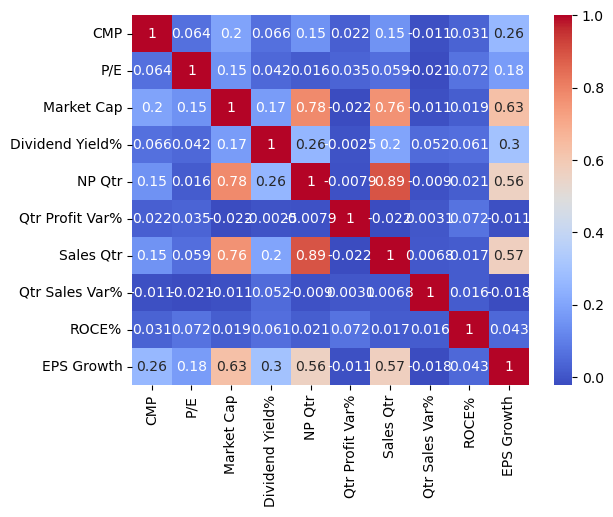

In [53]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: title={'center': 'Stocks by Cap in Financial Sector'}, xlabel='Type of CAP'>

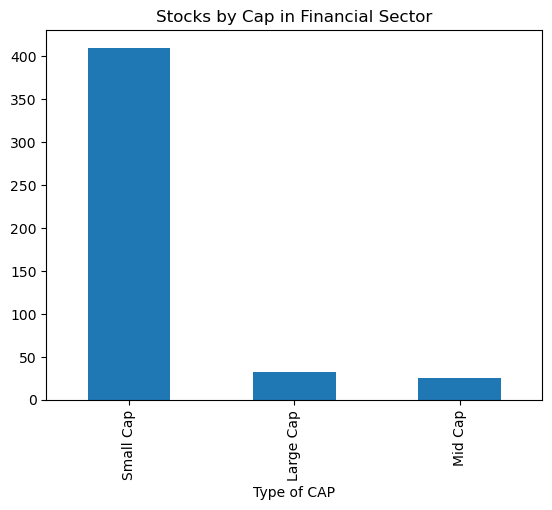

In [54]:
df["Type of CAP"].value_counts().plot(kind="bar",title="Stocks by Cap in Financial Sector")

1) What are the Large Cap Companies having P/E>20 and ROCE < mean of ROCE?


In [55]:
df[(df["P/E"]>20) & (df["ROCE%"]<df["ROCE%"].mean()) & (df["Type of CAP"]=="Large Cap")]

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
2,Jio Financial,351.90,141.03,223572.07,0.0,312.63,-5.81,417.82,0.89,1.55,Large Cap,8,Overvalued
3,I R F C,167.25,33.92,218570.76,0.9,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued
22,Tata Inv.Corpn.,7026.55,96.53,35551.04,0.4,131.07,-10.72,142.46,-6.03,1.67,Large Cap,8,Overvalued


In [56]:
df_c1 = df[(df["P/E"]>20) & (df["ROCE%"]<df["ROCE%"].mean()) & (df["Type of CAP"]=="Large Cap")]

<Figure size 700x600 with 0 Axes>

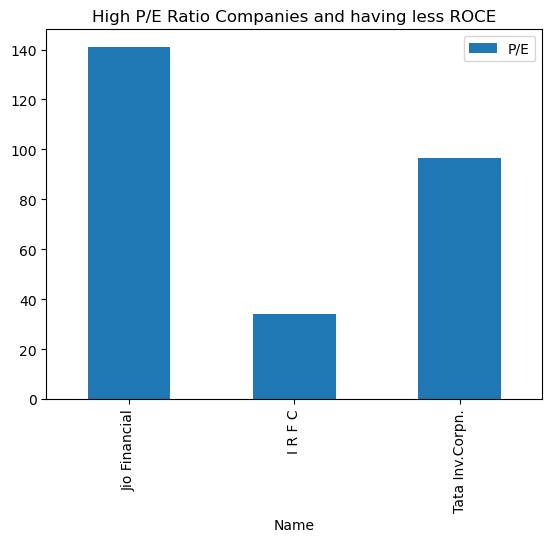

In [57]:
plt.figure(figsize=(7,6))
df_c1.plot(kind="bar",x="Name",y="P/E",title="High P/E Ratio Companies and having less ROCE")
plt.show()

<Axes: title={'center': 'Large Cap Companies and having less ROCE'}, xlabel='Name'>

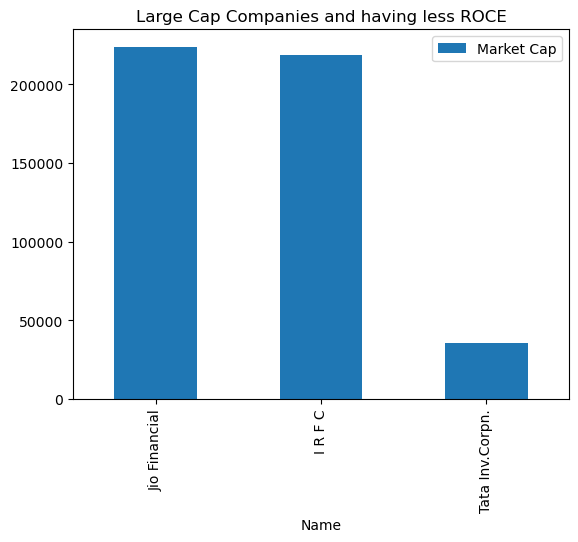

In [58]:
df_c1.plot(kind="bar",x="Name",y="Market Cap",title="Large Cap Companies and having less ROCE")

### Large vs Mid vs Small Cap Companies Market Cap

<Axes: xlabel='Sales Qtr', ylabel='Market Cap'>

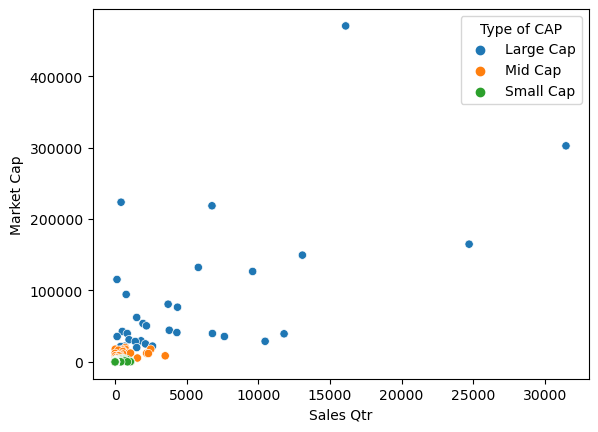

In [59]:
sns.scatterplot(data=df,x='Sales Qtr',y='Market Cap',hue='Type of CAP')

2) What are the top 10 companies in Large,Mid,Small Cap having top quarterly sales ?


In [60]:
# 10 Large Cap companies having highest Quarterly Sales
df_ten_lg = df[df["Type of CAP"]=="Large Cap"].nlargest(10,"Sales Qtr")
df_ten_md = df[df["Type of CAP"]=="Mid Cap"].nlargest(10,"Sales Qtr")
df_ten_sm = df[df["Type of CAP"]=="Small Cap"].nlargest(10,"Sales Qtr")
df_ten_lg[["CMP","P/E"]]

,CMP,P/E
1,1894.45,36.26
4,499.50,7.95
0,7598.50,31.51
5,567.70,10.21
20,1140.40,103.66
25,14260.70,31.99
7,3368.25,16.74
21,1896.55,18.27
19,723.30,8.38
3,167.25,33.92


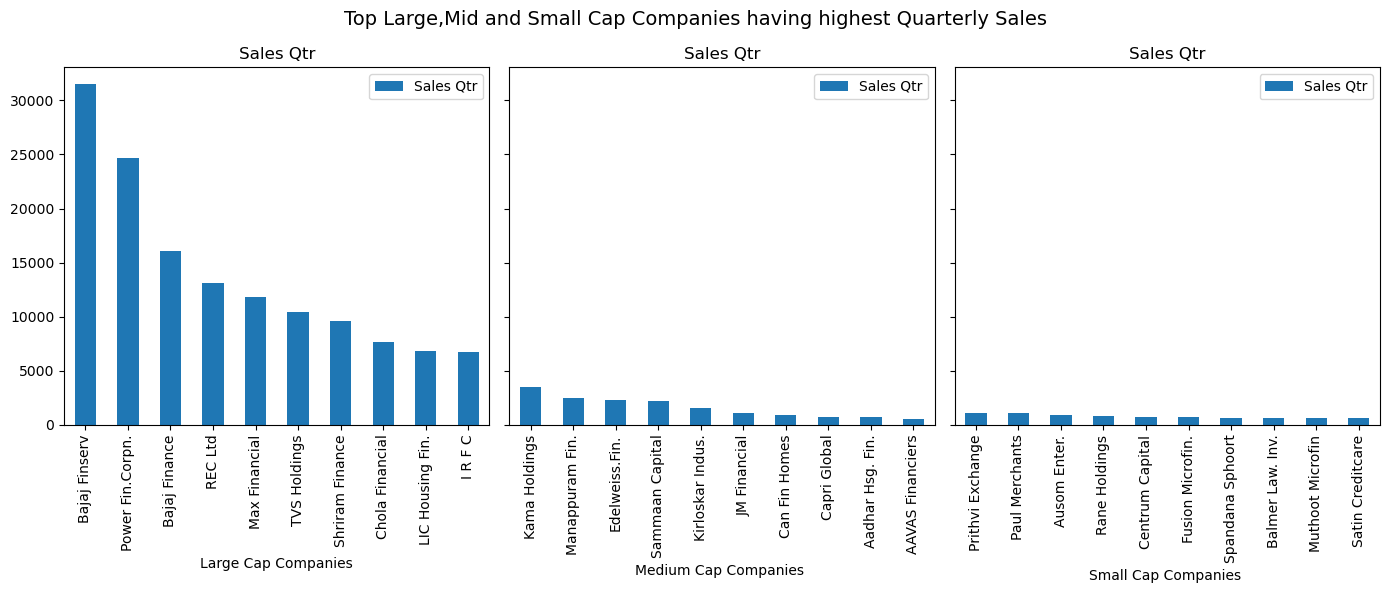

In [61]:
fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(14,6))
fig = plt.gcf()
fig.suptitle("Top Large,Mid and Small Cap Companies having highest Quarterly Sales", fontsize=14)
df_ten_lg.plot(ax=ax,kind="bar",x="Name",y="Sales Qtr",xlabel="Large Cap Companies",subplots=True)
df_ten_md.plot(ax=ax2,kind="bar",x="Name",y="Sales Qtr",xlabel="Medium Cap Companies ",subplots=True)
df_ten_sm.plot(ax=ax3,kind="bar",x="Name",y="Sales Qtr",xlabel="Small Cap Companies ",subplots=True)

fig.tight_layout()

plt.show()

3) What are the top 10 companies in Large,Mid,Small having top quarterly Net Profit ?

In [62]:
df_ten_lg = df[df["Type of CAP"]=="Large Cap"].nlargest(10,"NP Qtr")
df_ten_md = df[df["Type of CAP"]=="Mid Cap"].nlargest(10,"NP Qtr")
df_ten_sm = df[df["Type of CAP"]=="Small Cap"].nlargest(10,"NP Qtr")

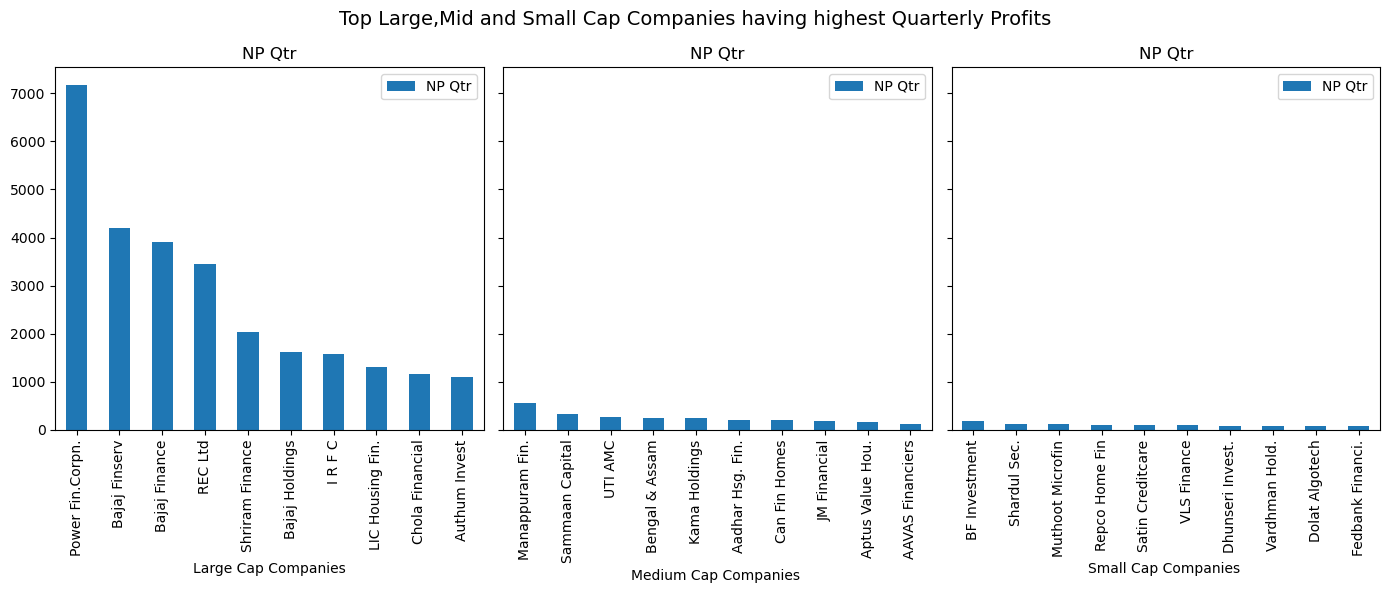

In [63]:
fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(14,6))
fig = plt.gcf()
fig.suptitle("Top Large,Mid and Small Cap Companies having highest Quarterly Profits", fontsize=14)
df_ten_lg.plot(ax=ax,kind="bar",x="Name",y="NP Qtr",xlabel="Large Cap Companies",subplots=True)
df_ten_md.plot(ax=ax2,kind="bar",x="Name",y="NP Qtr",xlabel="Medium Cap Companies ",subplots=True)
df_ten_sm.plot(ax=ax3,kind="bar",x="Name",y="NP Qtr",xlabel="Small Cap Companies ",subplots=True)

fig.tight_layout()

plt.show()

In [64]:
df.head()

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72,Large Cap,8,Overvalued
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55,Large Cap,8,Overvalued
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued


5) What are the top 10 companies in Large,Mid,Small giving highest and lowest dividend ?


In [65]:
df_ten_lg = df[df["Type of CAP"]=="Large Cap"].nlargest(10,"Dividend Yield%")
df_ten_md = df[df["Type of CAP"]=="Mid Cap"].nlargest(10,"Dividend Yield%")
df_ten_sm = df[df["Type of CAP"]=="Small Cap"].nlargest(10,"Dividend Yield%")

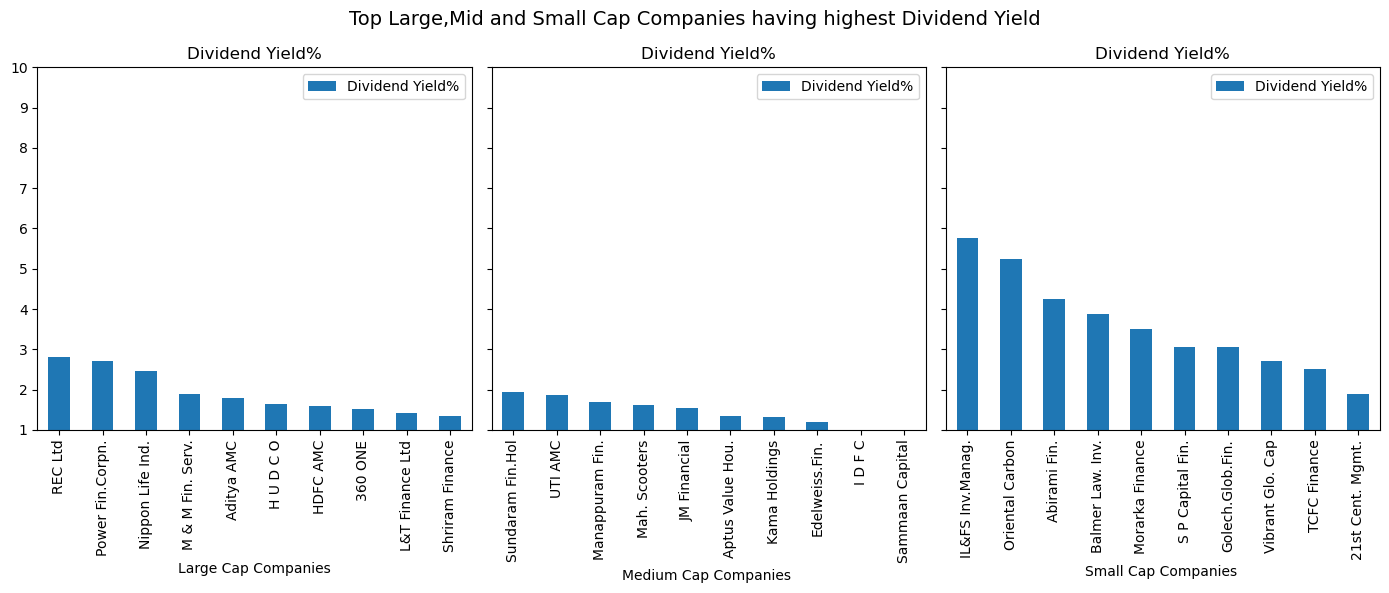

In [66]:
fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(14,6))
fig = plt.gcf()
fig.suptitle("Top Large,Mid and Small Cap Companies having highest Dividend Yield", fontsize=14)
df_ten_lg.plot(ax=ax,kind="bar",x="Name",y="Dividend Yield%",xlabel="Large Cap Companies",subplots=True,ylim=[1,10])
df_ten_md.plot(ax=ax2,kind="bar",x="Name",y="Dividend Yield%",xlabel="Medium Cap Companies ",subplots=True,ylim=[1,10])
df_ten_sm.plot(ax=ax3,kind="bar",x="Name",y="Dividend Yield%",xlabel="Small Cap Companies ",subplots=True,ylim=[1,10])

fig.tight_layout()

plt.show()

6) BlueChips having more than mean profit,sales,ROCE but P/E is less ? 


In [67]:
lg_mean_pe = df[(df["Type of CAP"]=="Large Cap")]['P/E'].mean()
lg_mean_np = df[(df["Type of CAP"]=="Large Cap")]['NP Qtr'].mean()
lg_mean_sales = df[(df["Type of CAP"]=="Large Cap")]['Sales Qtr'].mean()
lg_mean_roce = df[(df["Type of CAP"]=="Large Cap")]['ROCE%'].mean()

In [68]:
df_lg_u = df[(df["Type of CAP"]=="Large Cap") & (df["NP Qtr"]>lg_mean_np) & (df["ROCE%"]>lg_mean_roce) & (df["Sales Qtr"]>lg_mean_sales) & (df["P/E"]<lg_mean_pe)]

In [69]:
df_lg_u

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value


C:\Users\bhanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/E', ylabel='Density'>

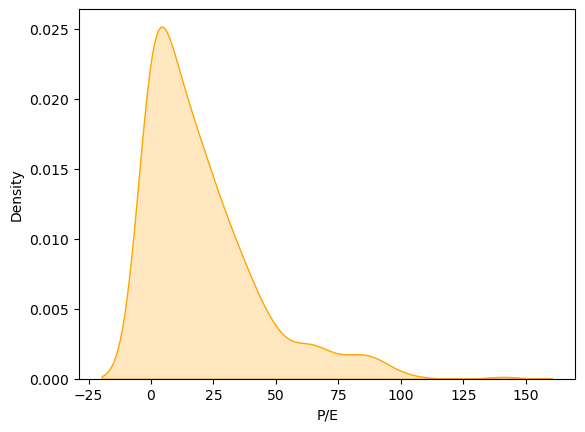

In [70]:
sns.kdeplot(data=df["P/E"],fill=True,color='orange')

7) What are undervalued stocks,overvalued,Faily valued ?

C:\Users\bhanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhanp\AppData\Local\Temp\ipykernel_6348\4270883640.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df,x="Qtr Profit Var%",kind='kde',fill=True,hue="Type of CAP",col='Peter Lynch Value')
C:\Users\bhanp\AppData\Local\Temp\ipykernel_6348\4270883640.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df,x="Qtr Profit Var%",kind='kde',fill=True,hue="Type of CAP",col='Peter Lynch Value')
C:\Users\bhanp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **k

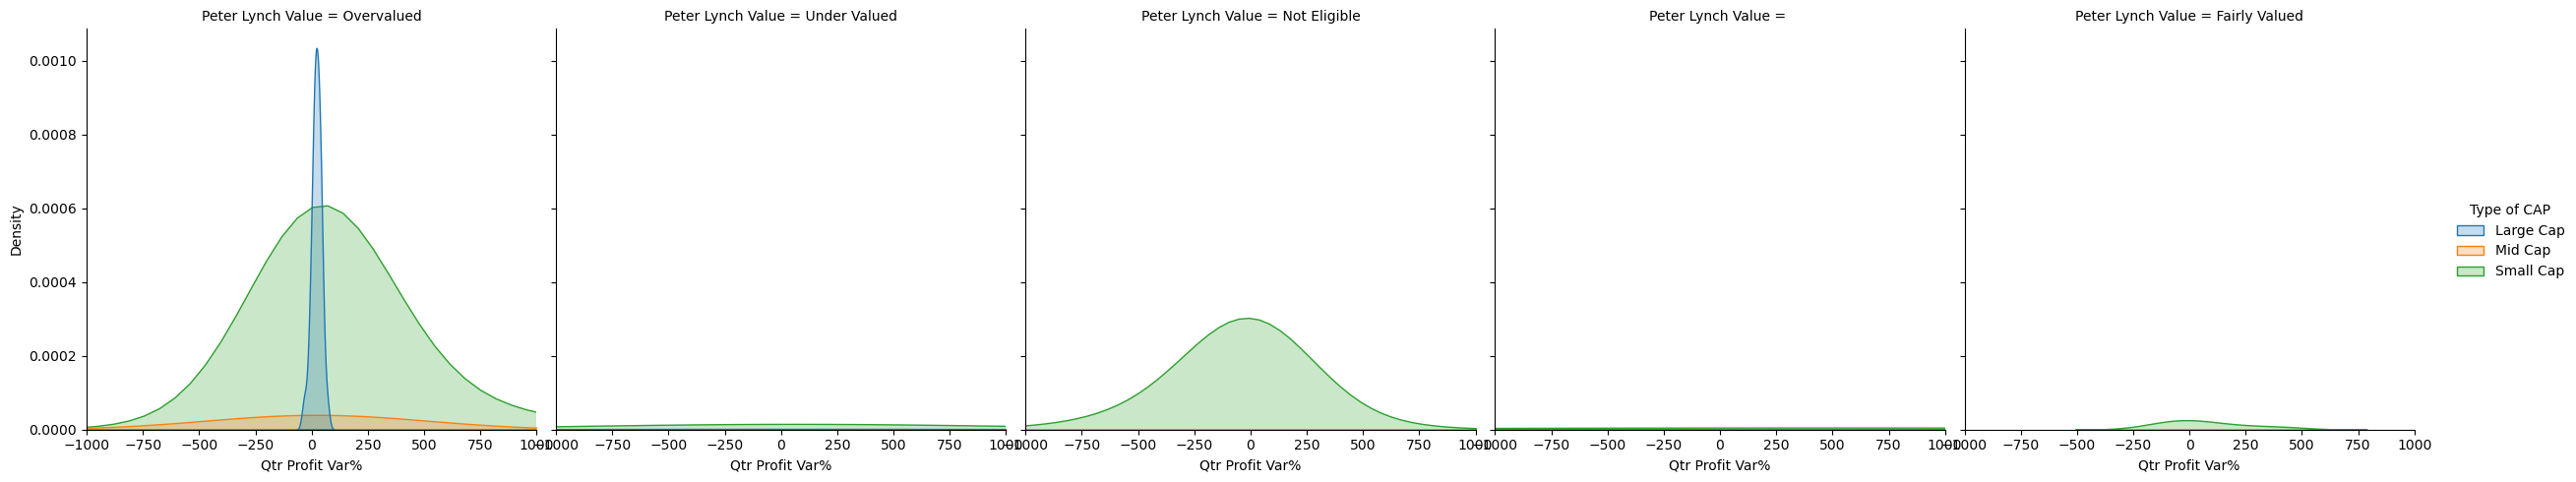

In [71]:
sns.displot(data=df,x="Qtr Profit Var%",kind='kde',fill=True,hue="Type of CAP",col='Peter Lynch Value')
plt.xlim(-1000, 1000)
plt.show()

<Axes: xlabel='Peter Lynch Value', ylabel='NP Qtr'>

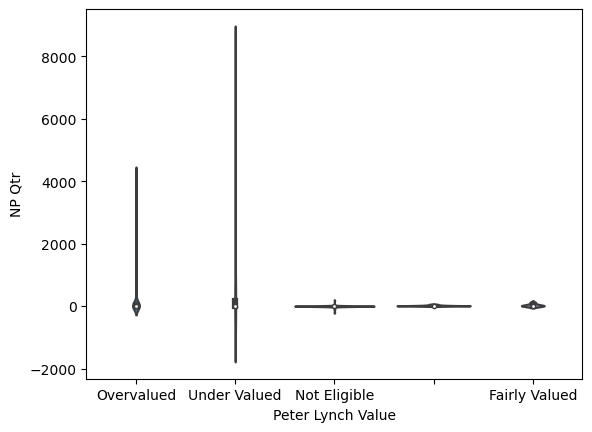

In [72]:
sns.violinplot(x=df["Peter Lynch Value"], y=df["NP Qtr"])

In [73]:
df['Peter Lynch Value']=df['Peter Lynch Value'].replace("","Not Eligible")

<Axes: title={'center': 'Peter Lynch Valued Companies'}, ylabel='count'>

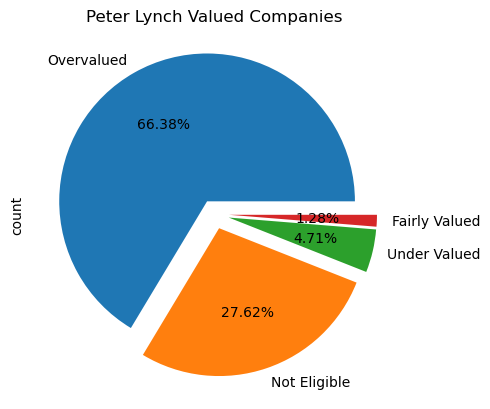

In [74]:
df["Peter Lynch Value"].value_counts().plot(kind="pie",autopct='%.2f%%',explode=[0.1,0.1,0.1,0.1],title="Peter Lynch Valued Companies")

##### Large Cap companies having P/E less than 15 and peter lynch valuation 

<Axes: xlabel='Peter Lynch Value', ylabel='P/E'>

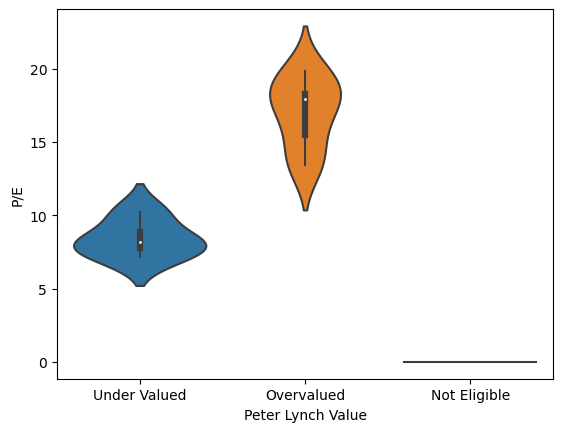

In [75]:
df_filterd_pe = df[(df['P/E']<20) & (df["Type of CAP"]=="Large Cap")]
sns.violinplot(x=df_filterd_pe["Peter Lynch Value"], y=df_filterd_pe["P/E"])

<Axes: xlabel='Peter Lynch Value', ylabel='P/E'>

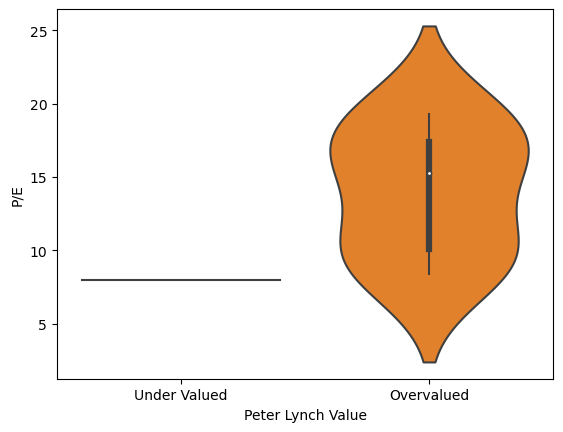

In [76]:
df_filterd_pe = df[(df['P/E']<20) & (df["Type of CAP"]=="Mid Cap")]
sns.violinplot(x=df_filterd_pe["Peter Lynch Value"], y=df_filterd_pe["P/E"])

<Axes: xlabel='Peter Lynch Value', ylabel='P/E'>

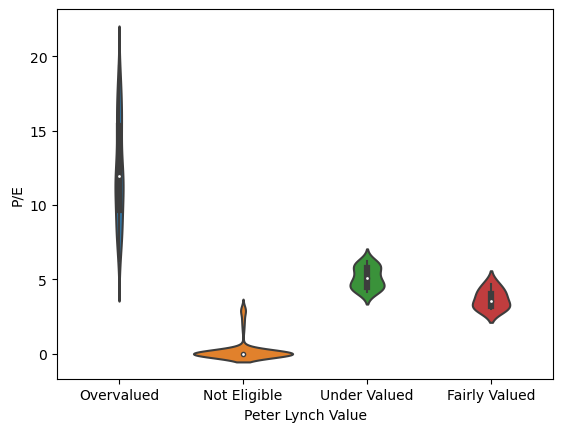

In [77]:
df_filterd_pe = df[(df['P/E']<20) & (df["Type of CAP"]=="Small Cap")]
sns.violinplot(x=df_filterd_pe["Peter Lynch Value"], y=df_filterd_pe["P/E"])

In [78]:
sum(df['P/E']>200)

0

<Axes: title={'center': 'No of Large,Mid,Small Cap companies'}, ylabel='count'>

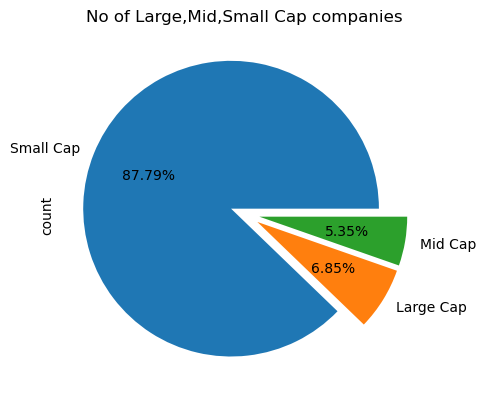

In [79]:
df["Type of CAP"].value_counts().plot(kind="pie",autopct='%.2f%%',explode=[0.1,0.1,0.1],title="No of Large,Mid,Small Cap companies")

### Insights 
 - In large cap companies which are over valued but having top net profit for the quarters and having more than 40000 crores of market cap stocks perfomed well in 2024 
 - REC Ltd having Market Cap of 160086.78 crores and 4079.09 NP Qtr but only P/E 11.32 lowest in all of the large cap companies 
   has recorded **(253.82%)** gain in 2024
- Shriram Finance Ltd having Market Cap of 100663.92 crores and 2021.28 NP Qtr but only P/E 13.67 second lowest in all of the large cap companies has recorded **(46.86%)** gain in 2024
-  Bajaj Holdings having Market Cap of 104646.77 crores and 1614.51 NP Qtr but only P/E 14.02 third lowest in all of the large cap companies has recorded **(25.73%)** gain in 2024
- Aditya Birla Cap having Market Cap of 56626.46 crores and 1288.11 NP Qtr but only P/E 16.98 has recorded **(16.16%)** gain in 2024
- Chola Financial having only Market Cap of 27725.36 crores and 1143.75 NP Qtr but only P/E 15.64 has recorded **(20.99%)** gain in 2024
- Muthoot Finance having  Market Cap of 69846.86 crores and 1056.29 NP Qtr but having P/E 17.25	 has recorded **(33.05%)** gain in 2024
- We also observed that companies having less than 40000 crores market cap and having standing in top at np qtr didnt performed well in 2024 companies are M & M Fin. Serv.	,PNB Housing,CreditAcc. Gram.

In [80]:
df[(df["Peter Lynch Value"]=="Overvalued") & (df["P/E"]<20) & (df["Type of CAP"]=="Large Cap")].nlargest(10,"NP Qtr")

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
7,Shriram Finance,3368.25,16.74,126633.15,1.34,2030.64,18.23,9604.98,20.02,11.27,Large Cap,8,Overvalued
8,Bajaj Holdings,10371.30,15.47,115422.20,1.26,1614.51,13.77,133.76,28.53,13.07,Large Cap,8,Overvalued
21,Chola Financial,1896.55,18.27,35612.93,0.03,1159.56,47.63,7632.71,35.68,10.72,Large Cap,8,Overvalued
10,Muthoot Finance,2013.05,19.46,80816.69,1.19,1078.68,10.62,3703.79,23.51,13.15,Large Cap,8,Overvalued
15,L&T Finance Ltd,177.91,17.94,44347.50,1.41,685.25,29.17,3784.40,17.41,8.22,Large Cap,8,Overvalued
17,M & M Fin. Serv.,332.95,19.86,41138.89,1.89,497.01,38.56,4315.52,20.44,8.74,Large Cap,8,Overvalued
24,PNB Housing,1137.05,18.31,29536.11,0.00,438.71,24.39,1812.53,6.69,9.27,Large Cap,8,Overvalued
31,CreditAcc. Gram.,1260.95,13.43,20106.23,0.79,397.66,14.83,1512.03,29.23,14.76,Large Cap,8,Overvalued
28,IIFL Finance,521.45,13.60,22122.11,0.77,338.16,-32.28,2613.40,13.56,11.81,Large Cap,8,Overvalued


### Insights
- There are no fairly valued companies in large cap 
- There is only one mid cap company having market cap of 17563.27 and net profit at 1537.12	QTR and having ver low P/E at 4.15 
  that is Authum Invest , it came to IPO in April 2024 but this stock gained 11.24 % within the 3 months time frame
- In small cap there are 10 fairly valued companies in that Jindal Ply Investments have the highest net profit for the quarter 
  and this stock gained **(62.11%)** in 2024
- Jindal Photo stands at second having 874 crore of market cap having only 3.38 P/E  (157.23%) gained in 2024
- LKP Finance stands at third having 226.17 crore of market cap having only 3.87 (84.43%) gained in 2024

In [81]:
df[(df["Peter Lynch Value"]=="Fairly Valued")].nlargest(20,"NP Qtr")

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
106,Shardul Sec.,423.40,3.93,740.95,0.00,113.87,395.52,140.18,360.66,28.87,Small Cap,6,Fairly Valued
103,Jindal Photo,822.35,3.02,843.73,0.00,47.42,41.43,0.63,40.00,12.34,Small Cap,6,Fairly Valued
143,LKP Finance,216.90,4.67,272.61,1.38,13.51,-7.02,20.74,-3.49,18.17,Small Cap,6,Fairly Valued
221,Elixir Capital,136.00,4.07,78.88,0.92,8.59,180.97,14.72,209.89,36.75,Small Cap,6,Fairly Valued
238,P. H. Capital,215.30,3.21,64.59,0.12,1.21,-64.72,47.30,8.19,73.50,Small Cap,6,Fairly Valued
293,Purshottam Inves,52.38,3.17,32.91,0.00,-0.11,-114.10,26.96,7.75,16.85,Small Cap,6,Fairly Valued


### Insights 
- Bajaj Finsev recorded highest no of sales and stands at second highest net profit quarter 
- Power Fin stands at first net profit quarter and stands at second highest sales but 
  when compared to peter lynch valuation **power fin** is **undervalued** and **bajaj finserv** is **overvalued** 
  when we see the stock price movements of bajaj finserv in 2024 it recorder **-4.74%** but power fin corporation 
  recorded **176%** upto date that is why looking into peter lynch valuation actually matters.
- There are only two undervalued Large cap companies in the financial sector those are **power fin** and **LIC Housing fin** 
  these two stocks recorded stock return at **172%** and **94%** for LIC housing

In [82]:
df[(df["Type of CAP"]=="Large Cap") & (df["Peter Lynch Value"]=="Under Valued")]

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued
5,REC Ltd,567.70,10.21,149488.13,2.82,3460.19,16.58,13078.66,17.78,10.05,Large Cap,8,Under Valued
19,LIC Housing Fin.,723.30,8.38,39786.06,1.24,1306.40,-0.96,6796.85,0.56,8.79,Large Cap,8,Under Valued
26,Authum Invest,1681.65,7.17,28562.00,0.00,1092.75,3253.02,1412.36,2213.07,39.34,Large Cap,8,Under Valued


### Insights 

- In small cap category the undervalued companies valued by peter lynch valuation and  companies having highest net profit for   the quarter and market cap holding greater 100 crores 
- BF investment stock price gaining **71% in 2024** having **250.24 NP Qtr**
- Satin Creditcare gaining **8.29%** in 2024 having **128.22 NP Qtr**
- A.K.Capital Serv gaining **97.47%** in 2024 having **30.21 NP Qtr**
- Shardul Securities gaining **173.53%** having **16.12 NP Qtr** in 2024
- Paul Merchants gaining **35.00%** and having **9.34 NP Qtr** in 2024
- Visco Trade gaining **263.74%** and having **5.27 NP Qtr** in 2024, 

In [83]:
df[(df["Type of CAP"]=="Small Cap") & (df["Peter Lynch Value"]=="Under Valued") & (df["Market Cap"]>100)].nlargest(20,'NP Qtr')

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
71,BF Investment,617.70,4.15,2326.26,0.00,182.61,224.35,7.72,32.19,10.63,Small Cap,6,Under Valued
72,Satin Creditcare,208.78,5.09,2306.41,0.00,105.28,19.81,632.66,36.84,16.65,Small Cap,6,Under Valued
86,VLS Finance,408.05,4.36,1419.85,0.37,93.24,1.40,130.31,16.72,14.09,Small Cap,6,Under Valued
89,Vardhman Hold.,3969.40,5.24,1266.24,0.13,73.13,67.00,6.60,11.86,6.07,Small Cap,6,Under Valued
176,Srestha Finvest,1.79,4.54,146.78,0.00,31.01,6947.73,39.50,1632.46,4.18,Small Cap,6,Under Valued
157,Visco Trade,88.03,4.81,211.40,0.23,18.73,137.39,34.18,-15.81,46.97,Small Cap,6,Under Valued
138,Paul Merchants,1051.65,5.95,324.33,0.00,13.32,-2.56,1063.15,-42.09,12.33,Small Cap,6,Under Valued


### Insights 
- In the Mid cap there are only 3 undervalued companies according to peter lynch valuation and the top largest net profit for the 
  quarter recorded by 
- Mannapuram Fin. having **563.49 NP Qtr** and the stock gained **57.26%** in 2024 
- Indiabulls Housing having **319.43 NP Qtr** and the stock gained **53.46%** in 2024 
- Bengal & Assam Company Ltd having **316.51 NP Qtr** the stock gained **84.74%** in 2024 


In [84]:
df[(df["Type of CAP"]=="Mid Cap") & (df["Peter Lynch Value"]=="Under Valued") & (df["Market Cap"]>100)].nlargest(20,'NP Qtr')

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
33,Manappuram Fin.,211.33,7.96,17887.71,1.68,556.52,11.84,2488.22,22.56,13.75,Mid Cap,7,Under Valued


In [85]:
df[df["P/E"]<20].nlargest(50,"NP Qtr")

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued
5,REC Ltd,567.70,10.21,149488.13,2.82,3460.19,16.58,13078.66,17.78,10.05,Large Cap,8,Under Valued
7,Shriram Finance,3368.25,16.74,126633.15,1.34,2030.64,18.23,9604.98,20.02,11.27,Large Cap,8,Overvalued
8,Bajaj Holdings,10371.30,15.47,115422.20,1.26,1614.51,13.77,133.76,28.53,13.07,Large Cap,8,Overvalued
19,LIC Housing Fin.,723.30,8.38,39786.06,1.24,1306.40,-0.96,6796.85,0.56,8.79,Large Cap,8,Under Valued
21,Chola Financial,1896.55,18.27,35612.93,0.03,1159.56,47.63,7632.71,35.68,10.72,Large Cap,8,Overvalued
26,Authum Invest,1681.65,7.17,28562.00,0.00,1092.75,3253.02,1412.36,2213.07,39.34,Large Cap,8,Under Valued
10,Muthoot Finance,2013.05,19.46,80816.69,1.19,1078.68,10.62,3703.79,23.51,13.15,Large Cap,8,Overvalued
15,L&T Finance Ltd,177.91,17.94,44347.50,1.41,685.25,29.17,3784.40,17.41,8.22,Large Cap,8,Overvalued
33,Manappuram Fin.,211.33,7.96,17887.71,1.68,556.52,11.84,2488.22,22.56,13.75,Mid Cap,7,Under Valued


### Hypothesis Testing

#### Testing if P/E ratio affects stock price

-- Perfoming T-Test

* Null Hypothesis (H0): There is no significant difference in stock price based on P/E ratio.
* Alternative Hypothesis (H1): There is a significant difference in stock price based on P/E ratio.

In [86]:
from scipy import stats


# Splitting the data based on P/E ratio
median_pe = df['P/E'][df["Type of CAP"]=="Small Cap"].median()
group_high_pe = df[(df['P/E'] > median_pe) & (df['Type of CAP']=="Small Cap")]['CMP']
group_low_pe = df[(df['P/E'] <= median_pe)  & (df['Type of CAP']=="Small Cap")]['CMP']

# Performing the t-test
t_stat, p_value = stats.ttest_ind(group_high_pe, group_low_pe)

print(f'T-test results: t_stat = {t_stat}, p_value = {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in stock prices based on P/E ratio.")
else:
    print("Fail to reject the null hypothesis: No significant difference in stock prices based on P/E ratio.")


T-test results: t_stat = 0.18414646722198508, p_value = 0.8539900425161743
Fail to reject the null hypothesis: No significant difference in stock prices based on P/E ratio.


#### Testing if high market cap companies have higher ROCE

Perfoming T-Test

* Null Hypothesis (H0): High market cap companies do not have significantly higher ROCE.
* Alternative Hypothesis (H1): High market cap companies have significantly higher ROCE.

In [87]:
# Splitting the data based on Market Cap
median_market_cap = df['Market Cap'].median()

group_high_market_cap = df[df['Market Cap'] > median_market_cap]['ROCE%']
group_low_market_cap = df[df['Market Cap'] <= median_market_cap]['ROCE%']

# Performing the t-test
t_stat, p_value = stats.ttest_ind(group_high_market_cap, group_low_market_cap)

print(f'T-test results: t_stat = {t_stat}, p_value = {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: High market cap companies have significantly higher ROCE.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ROCE based on market cap.")


T-test results: t_stat = 2.583120632366975, p_value = 0.010095425638731403
Reject the null hypothesis: High market cap companies have significantly higher ROCE.


### Testing the relationship between stock price and quarterly sales using correlation
* Calculate correlation: Determine if there is a linear relationship between stock price and quarterly sales.

In [88]:
# Calculating the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df['CMP'], df['Sales Qtr'])

print(f'Correlation results: correlation = {correlation}, p_value = {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant linear relationship between stock price and quarterly sales.")
else:
    print("Fail to reject the null hypothesis: No significant linear relationship between stock price and quarterly sales.")

Correlation results: correlation = 0.1522352299383017, p_value = 0.0009659176157347481
Reject the null hypothesis: There is a significant linear relationship between stock price and quarterly sales.


### Testing the relationship between stock price and quarterly net profit using correlation
* Calculate correlation: Determine if there is a linear relationship between stock price and net profit.

In [89]:
# Calculating the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df['CMP'], df['NP Qtr'])

print(f'Correlation results: correlation = {correlation}, p_value = {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant linear relationship between stock price and net profit.")
else:
    print("Fail to reject the null hypothesis: No significant linear relationship between stock price and net profit.")

Correlation results: correlation = 0.14645521405384604, p_value = 0.0015057636900977992
Reject the null hypothesis: There is a significant linear relationship between stock price and net profit.


In [90]:
# Calculating the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df['CMP'], df['P/E'])

print(f'Correlation results: correlation = {correlation}, p_value = {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant linear relationship between P/E Ratio and net profit.")
else:
    print("Fail to reject the null hypothesis: No significant linear relationship between P/E Ratio and net profit.")

Correlation results: correlation = 0.063761281236348, p_value = 0.16894542017636083
Fail to reject the null hypothesis: No significant linear relationship between P/E Ratio and net profit.


#### ANOVA to test if there are differences in ROCE across multiple sales groups
* Group data by Sales: Create groups based on quartiles of sales.
* Perform ANOVA: Compare ROCE across the different sales groups.

In [91]:
# Grouping the  data by Sales QTR quartiles
df['Sales_Group'] = pd.qcut(df['Sales Qtr'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Performing ANOVA
anova_result = stats.f_oneway(df[df['Sales_Group'] == 'Q1']['ROCE%'],
                              df[df['Sales_Group'] == 'Q2']['ROCE%'],
                              df[df['Sales_Group'] == 'Q3']['ROCE%'],
                              df[df['Sales_Group'] == 'Q4']['ROCE%'])

print(f'ANOVA results: F-statistic = {anova_result.statistic}, p_value = {anova_result.pvalue}')
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There are significant differences in ROCE across sales groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences in ROCE across sales groups.")


ANOVA results: F-statistic = 9.310380169755268, p_value = 5.475599578661496e-06
Reject the null hypothesis: There are significant differences in ROCE across sales groups.


In [92]:
df["Sector"] = "Finance"

In [93]:
df

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued,Q4,Finance
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72,Large Cap,8,Overvalued,Q4,Finance
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55,Large Cap,8,Overvalued,Q4,Finance
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued,Q4,Finance
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued,Q4,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Lyons Corporate,4.87,0.00,2.28,0.00,-0.05,-25.00,0.22,144.44,4.85,Small Cap,6,Not Eligible,Q1,Finance
463,Charms Industrie,5.51,0.00,2.26,0.00,-0.03,0.00,0.00,-100.00,-24.30,Small Cap,6,Not Eligible,Q1,Finance
464,Oswal Leasing,39.77,0.00,1.99,0.00,-0.01,0.00,0.04,0.00,-1.44,Small Cap,6,Not Eligible,Q1,Finance
465,Aneri Fincap,6.19,0.00,1.87,0.00,0.00,100.00,0.00,-100.00,-620.05,Small Cap,6,Not Eligible,Q1,Finance


In [94]:
df.to_csv("finance_stocks_ml.csv")

In [95]:
df.head(n=10)

,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued,Q4,Finance
1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72,Large Cap,8,Overvalued,Q4,Finance
2,Jio Financial,351.90,141.03,223572.07,0.00,312.63,-5.81,417.82,0.89,1.55,Large Cap,8,Overvalued,Q4,Finance
3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued,Q4,Finance
4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued,Q4,Finance
5,REC Ltd,567.70,10.21,149488.13,2.82,3460.19,16.58,13078.66,17.78,10.05,Large Cap,8,Under Valued,Q4,Finance
6,Cholaman.Inv.&Fn,1574.50,36.18,132321.32,0.13,947.15,33.41,5812.31,41.77,10.41,Large Cap,8,Overvalued,Q4,Finance
7,Shriram Finance,3368.25,16.74,126633.15,1.34,2030.64,18.23,9604.98,20.02,11.27,Large Cap,8,Overvalued,Q4,Finance
8,Bajaj Holdings,10371.30,15.47,115422.20,1.26,1614.51,13.77,133.76,28.53,13.07,Large Cap,8,Overvalued,Q4,Finance
9,HDFC AMC,4422.40,45.58,94467.20,1.58,603.98,26.49,775.24,34.93,37.72,Large Cap,8,Overvalued,Q4,Finance


In [96]:
df.drop(df[df["P/E"]==0.00].index,axis=0,inplace=True)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
df[["Sales Qtr","NP Qtr"]]

,Sales Qtr,NP Qtr
0,16098.67,3911.98
1,31479.93,4209.28
2,417.82,312.63
3,6765.63,1576.83
4,24716.76,7182.06
...,...,...
451,0.17,0.07
455,0.00,0.05
458,0.00,0.05
460,0.00,-0.06


In [99]:
x = df[["Sales Qtr"]]
y = df["NP Qtr"]

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=23)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)
score = mean_absolute_error(y_test,y_pred)
score
r2_score(y_test,y_pred)

0.3670487849721097

In [104]:
from sklearn.datasets import load_iris

In [105]:
y_train

18     243.74
430      0.03
84      76.93
28     338.16
281      0.46
        ...  
276      0.29
32     200.14
41     186.98
267      0.79
86      93.24
Name: NP Qtr, Length: 315, dtype: float64

In [106]:
import numpy as np

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [108]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(random_state=0)

In [109]:
y_test

263       0.32
185       1.12
312       0.91
14      557.75
154       7.15
359       0.08
101       4.30
60      113.22
76       24.22
262       0.35
71      182.61
26     1092.75
117       3.89
51      251.20
205       0.28
145       8.12
314       0.11
282       7.19
290       0.57
39      126.10
406      -0.01
148       1.71
347       0.81
187       0.75
270       0.95
198       3.06
116       5.86
220       1.18
334       0.05
308       0.23
391       0.04
2       312.63
102      55.95
75       64.69
275       0.20
Name: NP Qtr, dtype: float64

In [110]:
y_pred = regressor.predict(x_test) 
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.10787141023450741

In [111]:
y_pred

array([ 1.25000e-01,  1.77000e+00, -6.00000e-02,  3.26760e+02,
        1.75000e+00,  4.00000e-02,  1.21000e+00,  1.05280e+02,
        7.87200e+01,  7.25000e-01,  4.70000e+00,  3.83690e+02,
        1.39000e+00,  1.07868e+03,  1.01000e+00,  1.03000e+00,
        8.00000e-02,  6.45000e+00,  3.70000e-01,  2.74300e+02,
        1.10000e-01,  3.58000e+00,  3.58000e+00,  7.73000e+00,
        2.90000e-01,  1.90000e-01,  1.99000e+00,  6.50000e-01,
        2.00000e-01,  1.75000e+00,  6.00000e-02,  1.05440e+02,
        5.86000e+00,  1.05280e+02,  2.42000e+00])

<Axes: xlabel='Sales Qtr', ylabel='NP Qtr'>

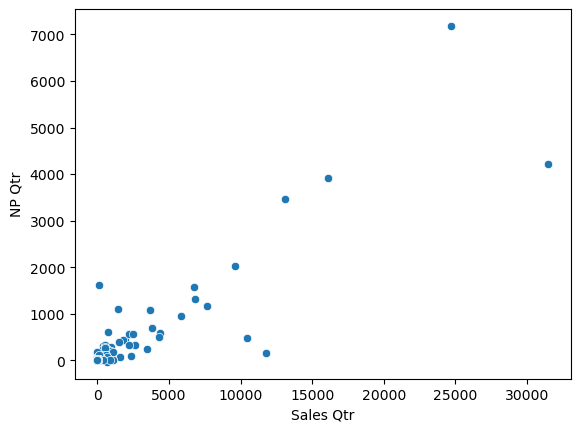

In [112]:
sns.scatterplot(x=df["Sales Qtr"],y=df["NP Qtr"])

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=-1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test) 
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.3632942210741813

In [115]:
df = df.reset_index()

In [116]:
df.describe()

,index,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,EPS Growth
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,205.451429,738.676686,27.016514,9305.029371,0.347943,122.835114,272.632400,607.737943,2490.855457,15.441886,6.248571
std,130.440522,2629.888970,22.163857,38948.992448,0.780341,564.268052,1099.045427,2711.346529,42074.564837,28.286085,0.604127
min,0.000000,0.910000,0.680000,2.680000,0.000000,-35.620000,-700.000000,-0.090000,-112.000000,-12.480000,6.000000
25%,91.500000,22.862500,11.202500,25.165000,0.000000,0.302500,-1.042500,0.810000,0.000000,4.920000,6.000000
50%,195.500000,85.785000,20.985000,105.010000,0.000000,1.860000,28.105000,7.155000,21.240000,10.065000,6.000000
75%,312.750000,331.000000,35.242500,1088.392500,0.325000,23.650000,121.930000,64.177500,68.577500,15.560000,6.000000
max,461.000000,34290.000000,141.030000,470344.350000,5.770000,7182.060000,10964.260000,31479.930000,786736.360000,437.750000,8.000000


In [117]:
df[df["Dividend Yield%"]>2]

,index,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
4,4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued,Q4,Finance
5,5,REC Ltd,567.70,10.21,149488.13,2.82,3460.19,16.58,13078.66,17.78,10.05,Large Cap,8,Under Valued,Q4,Finance
16,16,Nippon Life Ind.,674.05,35.45,42682.19,2.45,332.33,40.99,504.96,42.58,36.24,Large Cap,8,Overvalued,Q4,Finance
73,75,Balmer Law. Inv.,97.95,12.62,2174.22,3.88,64.69,11.71,640.67,7.79,17.81,Small Cap,6,Overvalued,Q4,Finance
118,128,IL&FS Inv.Manag.,12.14,84.16,381.24,5.77,-3.72,-300.59,7.77,-41.58,6.80,Small Cap,6,Overvalued,Q3,Finance
132,145,Oriental Carbon,267.40,13.58,267.14,5.24,8.12,-79.08,18.68,-2.45,9.79,Small Cap,6,Overvalued,Q3,Finance
153,170,Vibrant Glo. Cap,74.00,3.12,169.51,2.70,13.86,105.03,74.03,78.47,33.41,Small Cap,6,Not Eligible,Q4,Finance
198,223,Morarka Finance,170.95,24.42,76.93,3.51,1.64,-65.90,0.81,-84.21,4.04,Small Cap,6,Overvalued,Q2,Finance
201,226,TCFC Finance,71.78,6.24,75.23,2.51,3.62,-6.46,4.81,-10.76,15.56,Small Cap,6,Under Valued,Q3,Finance
243,286,S P Capital Fin.,57.46,43.71,34.53,3.05,0.29,262.50,0.95,93.88,3.17,Small Cap,6,Overvalued,Q2,Finance


In [118]:
df[df["Qtr Profit Var%"] > 0 &  (df["Qtr Profit Var%"]<100) ]

,index,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
0,0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued,Q4,Finance
1,1,Bajaj Finserv,1894.45,36.26,302479.65,0.05,4209.28,10.04,31479.93,35.22,11.72,Large Cap,8,Overvalued,Q4,Finance
3,3,I R F C,167.25,33.92,218570.76,0.90,1576.83,1.30,6765.63,1.29,5.73,Large Cap,8,Overvalued,Q4,Finance
4,4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued,Q4,Finance
5,5,REC Ltd,567.70,10.21,149488.13,2.82,3460.19,16.58,13078.66,17.78,10.05,Large Cap,8,Under Valued,Q4,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,448,KEN Fin.Serv.,14.00,42.00,4.20,0.00,0.01,200.00,0.15,7.14,3.33,Small Cap,6,Overvalued,Q1,Finance
345,451,Rajkot Inv.Trust,40.31,26.87,4.03,0.00,0.07,333.33,0.17,466.67,0.52,Small Cap,6,Overvalued,Q1,Finance
346,455,R R Securities,11.29,31.00,3.41,0.00,0.05,25.00,0.00,0.00,2.13,Small Cap,6,Overvalued,Q1,Finance
347,458,Kanungo Financi.,7.11,12.19,3.29,0.00,0.05,66.67,0.00,0.00,6.24,Small Cap,6,Overvalued,Q1,Finance


In [119]:
df["NP Qtr"].mean()
avg_profit_lg = df[df["Type of CAP"]=="Large Cap"]["NP Qtr"].mean()
avg_profit_mid = df[df["Type of CAP"]=="Mid Cap"]["NP Qtr"].mean()
avg_profit_sm = df[df["Type of CAP"]=="Small Cap"]["NP Qtr"].mean()

In [120]:
avg_pe_lg = df[df["Type of CAP"]=="Large Cap"]["P/E"].mean()
avg_pe_mid = df[df["Type of CAP"]=="Mid Cap"]["P/E"].mean()
avg_pe_sm = df[df["Type of CAP"]=="Small Cap"]["P/E"].mean()

In [121]:
avg_profit_lg,avg_profit_mid,avg_profit_sm

(1191.5225806451615, 141.43200000000002, 8.569013605442176)

In [122]:
avg_pe_lg,avg_pe_mid,avg_pe_sm

(33.3416129032258, 29.656399999999998, 26.12510204081633)

In [123]:
df[(df["NP Qtr"] > avg_profit_lg)  & (df["P/E"]<avg_pe_lg)]

,index,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
0,0,Bajaj Finance,7598.50,31.51,470344.35,0.47,3911.98,13.82,16098.67,28.81,11.93,Large Cap,8,Overvalued,Q4,Finance
4,4,Power Fin.Corpn.,499.50,7.95,164840.08,2.70,7182.06,21.13,24716.76,17.65,9.85,Large Cap,8,Under Valued,Q4,Finance
5,5,REC Ltd,567.70,10.21,149488.13,2.82,3460.19,16.58,13078.66,17.78,10.05,Large Cap,8,Under Valued,Q4,Finance
7,7,Shriram Finance,3368.25,16.74,126633.15,1.34,2030.64,18.23,9604.98,20.02,11.27,Large Cap,8,Overvalued,Q4,Finance
8,8,Bajaj Holdings,10371.30,15.47,115422.20,1.26,1614.51,13.77,133.76,28.53,13.07,Large Cap,8,Overvalued,Q4,Finance
19,19,LIC Housing Fin.,723.30,8.38,39786.06,1.24,1306.40,-0.96,6796.85,0.56,8.79,Large Cap,8,Under Valued,Q4,Finance


In [124]:
df[(df["NP Qtr"] > avg_profit_mid) & (df["Type of CAP"]=="Mid Cap")]

,index,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
31,32,Aadhar Hsg. Fin.,462.80,26.52,19888.30,0.00,200.14,36.79,713.14,20.17,11.36,Mid Cap,7,Overvalued,Q4,Finance
32,33,Manappuram Fin.,211.33,7.96,17887.71,1.68,556.52,11.84,2488.22,22.56,13.75,Mid Cap,7,Under Valued,Q4,Finance
35,36,Aptus Value Hou.,336.00,26.15,16770.69,1.34,171.75,20.73,394.94,29.22,14.68,Mid Cap,7,Overvalued,Q4,Finance
36,37,UTI AMC,1288.50,20.91,16420.77,1.86,274.30,8.43,529.22,13.14,22.60,Mid Cap,7,Overvalued,Q4,Finance
39,40,Can Fin Homes,931.20,16.17,12399.31,0.64,199.64,8.83,931.08,13.00,9.26,Mid Cap,7,Overvalued,Q4,Finance
40,41,JM Financial,129.37,18.54,12364.59,1.55,186.98,2.89,1077.05,0.98,10.13,Mid Cap,7,Overvalued,Q4,Finance
41,42,Sammaan Capital,168.41,9.68,12074.28,0.74,326.76,10.32,2206.67,16.12,10.08,Mid Cap,7,Overvalued,Q4,Finance
44,45,Bengal & Assam,9991.65,8.40,11286.90,0.40,256.41,-15.95,528.27,-87.54,14.11,Mid Cap,7,Overvalued,Q4,Finance
50,51,Kama Holdings,2666.95,10.49,8558.40,1.33,251.20,-31.64,3500.74,4.11,13.56,Mid Cap,7,Overvalued,Q4,Finance


In [125]:
df[(df["NP Qtr"] > avg_profit_sm) & (df["Type of CAP"]=="Small Cap")]

,index,Name,CMP,P/E,Market Cap,Dividend Yield%,NP Qtr,Qtr Profit Var%,Sales Qtr,Qtr Sales Var%,ROCE%,Type of CAP,EPS Growth,Peter Lynch Value,Sales_Group,Sector
56,57,Fedbank Financi.,122.40,17.43,4550.67,0.00,70.23,30.35,477.31,32.08,10.48,Small Cap,6,Overvalued,Q4,Finance
57,58,Spandana Sphoort,600.15,10.49,4279.38,0.00,51.29,-53.85,663.13,36.21,14.16,Small Cap,6,Overvalued,Q4,Finance
58,59,Indostar Capital,291.00,38.89,3959.91,0.00,24.93,-35.96,389.55,30.25,8.35,Small Cap,6,Overvalued,Q4,Finance
59,60,Muthoot Microfin,231.25,8.44,3942.63,0.00,113.22,18.33,637.88,33.25,14.97,Small Cap,6,Overvalued,Q4,Finance
60,61,PTC India Fin,55.22,21.06,3546.69,1.81,44.40,20.78,161.22,-15.04,8.93,Small Cap,6,Overvalued,Q4,Finance
61,62,Repco Home Fin,558.15,8.49,3491.86,0.54,105.44,18.35,407.83,11.89,10.53,Small Cap,6,Overvalued,Q4,Finance
62,63,Rane Holdings,2351.00,18.02,3357.23,1.06,19.50,-49.49,830.85,-7.11,12.95,Small Cap,6,Overvalued,Q4,Finance
64,66,Dolat Algotech,175.10,14.26,3081.76,0.14,71.68,456.95,123.48,243.76,27.11,Small Cap,6,Overvalued,Q4,Finance
66,68,SG Finserve,478.60,32.49,2675.13,0.00,19.39,23.98,43.54,24.97,12.20,Small Cap,6,Overvalued,Q4,Finance
68,70,Nalwa Sons Invst,4602.10,34.77,2365.48,0.00,29.20,75.77,39.65,57.53,0.73,Small Cap,6,Overvalued,Q4,Finance
